In [80]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

[khanacademy](https://www.khanacademy.org/math/ap-statistics/bivariate-data-ap/assessing-fit-least-squares-regression/v/standard-dev-residuals?modal=1)

<img src="imgs/Screen Shot 2019-08-13 at 12.16.12 AM.png">

In [2]:
x = np.array([1, 2, 2, 3])
y = np.array([1, 2, 3, 6])

In [6]:
slope, intercept, rvalue, pvalue, stderr = stats.linregress(x, y)

In [8]:
yhat = intercept + slope * x

In [58]:
x_test = x.reshape(-1, 1)
y_test = y.reshape(-1, 1)
reg = LinearRegression()
reg.fit(x_test, y_test)
y_pred = reg.predict(x_test)

In [22]:
df = DataFrame({
    'x': x,
    'y': y,
    'yhat': yhat,
    '(y - yhat)**2': (y - yhat)**2
})

In [25]:
df

,x,y,yhat,(y - yhat)**2
0,1,1,0.5,0.25
1,2,2,3.0,1.00
2,2,3,3.0,0.00
3,3,6,5.5,0.25


In [28]:
y.shape

(4,)

$$ \sqrt{ \frac{ \sum (residual)^{2} }{n-2} } $$

$$ \sqrt { \frac{ \sum (y-\hat{y})^{2} }{n-2} } $$

In [74]:
def rmsd(y, yhat, i=0):
    n = len(y)
    return np.sqrt(np.sum((y - yhat) ** 2) / (n - i))

In [79]:
print('divided by 1: \t', rmsd(y, yhat, 1))
print('divided by 2: \t', rmsd(y, yhat, 2))
print('divided by 0: \t', rmsd(y, yhat))

divided by 1: 	 0.7071067811865476
divided by 2: 	 0.8660254037844386
divided by 0: 	 0.6123724356957945


In [81]:
stderr

0.6123724356957947

In [82]:
mean_squared_error(y_test, y_pred, squared=False)

0.6123724356957945

Text(0, 0.5, 'Score')

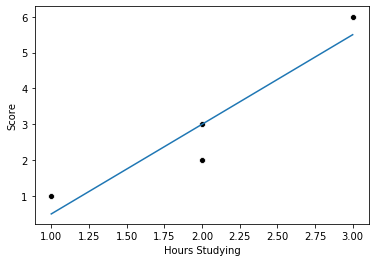

In [45]:
sns.scatterplot(x, y, color='k')
sns.lineplot(x, yhat)
plt.xlabel('Hours Studying')
plt.ylabel('Score')

Text(0, 0.5, 'Score')

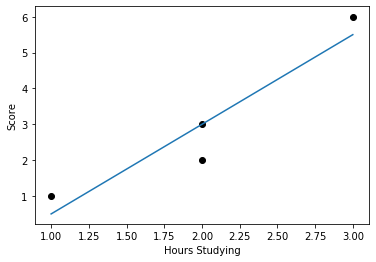

In [61]:
plt.scatter(x_test, y_test, color='k')
plt.plot(x_test, y_pred)
plt.xlabel('Hours Studying')
plt.ylabel('Score')